<a href="https://colab.research.google.com/github/VMBoehm/N3AS_Project_Malika/blob/main/AUGUSTTHIRDSALIENCY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
#! ls ./drive/MyDrive/

In [4]:
import matplotlib.pyplot as plt

In [5]:
train_gen = keras.preprocessing.image_dataset_from_directory(
    './drive/MyDrive/z1',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='training',
    interpolation="bilinear",
    follow_links=False
)

valid_gen = keras.preprocessing.image_dataset_from_directory(
    './drive/MyDrive/z1',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="grayscale",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=1534,
    validation_split=0.2,
    subset='validation',
    interpolation="bilinear",
    follow_links=False
)

Found 3460 files belonging to 2 classes.
Using 2768 files for training.
Found 3460 files belonging to 2 classes.
Using 692 files for validation.


In [6]:
class_names = train_gen.class_names
print(class_names)

['class_massive_0', 'class_massive_10']


In [7]:
pic = train_gen.take(1)

In [8]:
print(pic)

<TakeDataset element_spec=(TensorSpec(shape=(None, 128, 128, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [9]:
import matplotlib.pyplot as plt



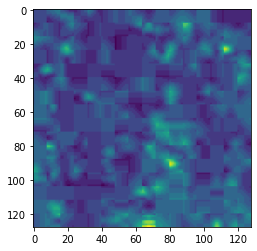

In [10]:
plt.imshow(np.squeeze(next(iter(valid_gen))[0][0]/255))

In [11]:
new_model = tf.keras.models.load_model('./drive/MyDrive/my_model')


In [12]:
"""
# TASK: add validation data (https://keras.io/api/models/model_training_apis/)
new_model.fit(train_gen, epochs=3, validation_data=valid_gen)
"""

'\n# TASK: add validation data (https://keras.io/api/models/model_training_apis/)\nnew_model.fit(train_gen, epochs=3, validation_data=valid_gen)\n'

In [13]:
new_model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 128, 128, 1)]     0         
                                                                 
 gray_to_rgb_norm (Gray2VGGI  (None, 128, 128, 3)      0         
 nput)                                                           
                                                                 
 rescaling (Rescaling)       (None, 128, 128, 3)       0         
                                                                 
 inception_v3 (Functional)   (None, 2, 2, 2048)        21802784  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
 dense (Dense)               (None, 1)                 2049  

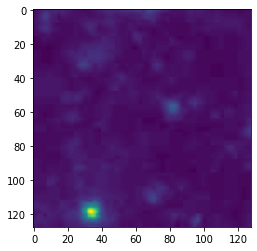

In [14]:
from keras.preprocessing.image import load_img, img_to_array
_img = load_img("./drive/MyDrive/z1/class_massive_10/63.jpg",target_size=(128,128),color_mode= "grayscale")
plt.imshow(_img)
plt.show()

In [15]:
input_arr_ = tf.keras.preprocessing.image.img_to_array(_img)
input_arr_ = np.array([input_arr_])  # Convert single image to a batch.
predictions_ = new_model.predict(input_arr_)

In [16]:
print(predictions_)

[[-7.5431767]]


In [17]:
images = tf.Variable(input_arr_, dtype=float)

with tf.GradientTape() as tape:
    pred = new_model(images, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
grads_ = tape.gradient(loss, images)

In [18]:
dgrad_abs = tf.math.abs(grads_)

In [19]:
dgrad_max_ = np.max(dgrad_abs, axis=3)[0]
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

In [20]:
arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
grad_eval = (dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18)

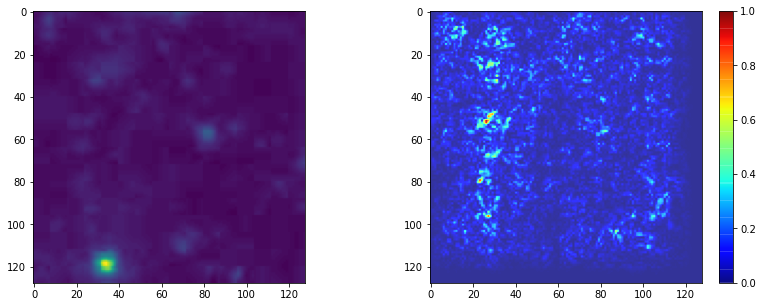

In [21]:
fig, axes = plt.subplots(1,2,figsize=(14,5))
axes[0].imshow(_img)
i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
fig.colorbar(i)

In [22]:
from keras.applications.inception_v3 import preprocess_input

In [23]:
def get_image(path):
  input_arr = tf.keras.preprocessing.image.img_to_array(path)
  input_arr = np.array([input_arr])  # Convert single image to a batch.
  images = tf.Variable(input_arr, dtype=float)
  return images


In [24]:
def get_grad(image):
  with tf.GradientTape() as tape:
    pred = new_model(image, training=False)
    class_idxs_sorted = np.argsort(pred.numpy().flatten())[::-1]
    loss = pred[0][class_idxs_sorted[0]]
    
  grads = tape.gradient(loss, image)
  return grads

This is where the Saliency Maps for massive neutrinos are

In [25]:
m_img1 = load_img("./drive/MyDrive/z1/class_massive_10/63.jpg",target_size=(128,128),color_mode= "grayscale")
m_img2 = load_img("./drive/MyDrive/z1/class_massive_10/77.jpg",target_size=(128,128),color_mode= "grayscale")
m_img3 = load_img("./drive/MyDrive/z1/class_massive_10/88.jpg",target_size=(128,128),color_mode= "grayscale")
m_img4 = load_img("./drive/MyDrive/z1/class_massive_10/162.jpg",target_size=(128,128),color_mode= "grayscale")
m_img5 = load_img("./drive/MyDrive/z1/class_massive_10/176.jpg",target_size=(128,128),color_mode= "grayscale")

In [26]:
m_image_1= get_image(m_img1)
m_image_2= get_image(m_img2)
m_image_3= get_image(m_img3)
m_image_4= get_image(m_img4)
m_image_5= get_image(m_img5)


In [27]:
m_grad_1 = get_grad(m_image_1)
m_grad_2 = get_grad(m_image_2)
m_grad_3 = get_grad(m_image_3)
m_grad_4 = get_grad(m_image_4)
m_grad_5 = get_grad(m_image_5)

In [28]:
M_grad = [m_grad_1,m_grad_2,m_grad_3,m_grad_4,m_grad_5] 
M_IMG = [m_img1,m_img2,m_img3,m_img4,m_img5]


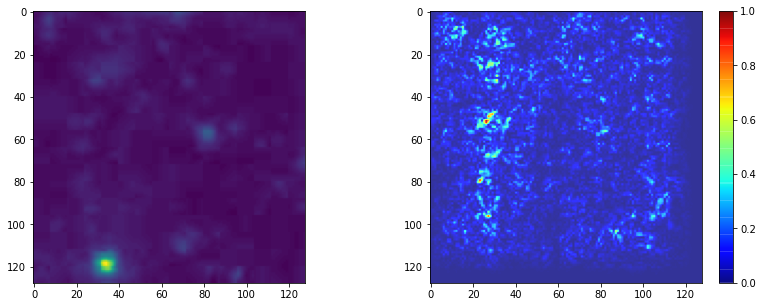

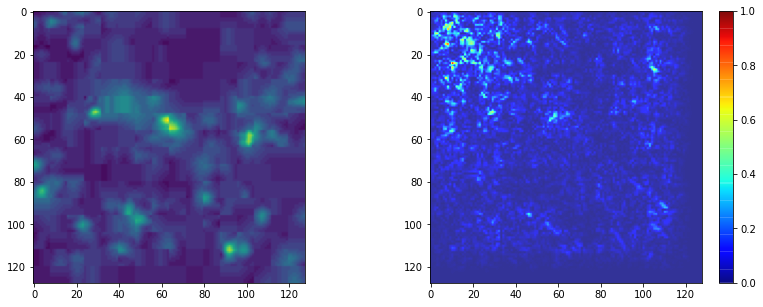

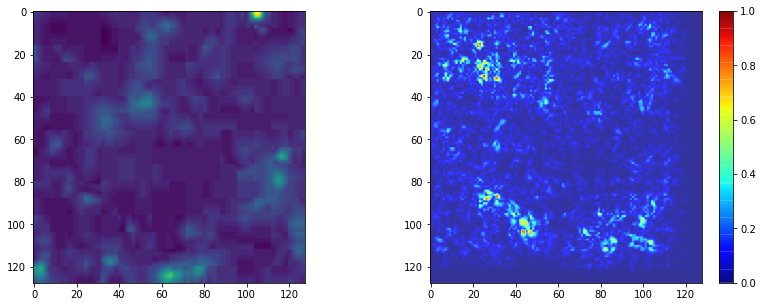

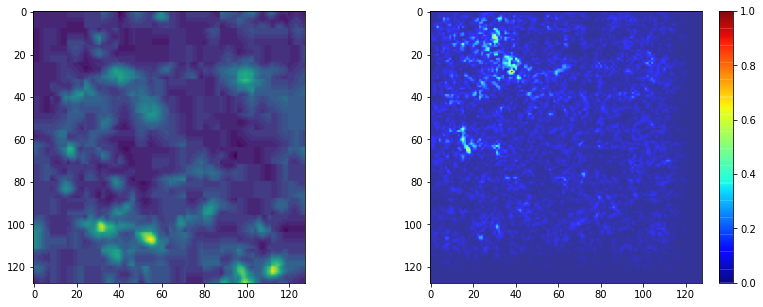

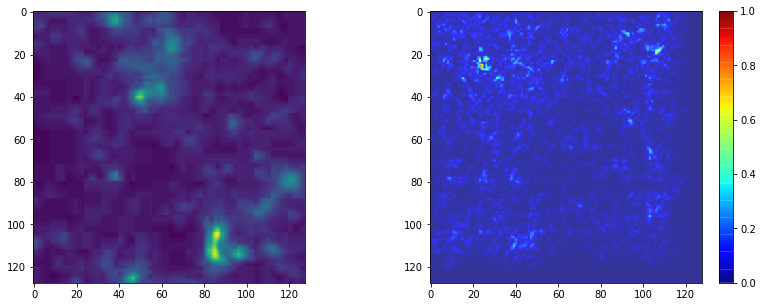

In [29]:
for i in range(5):
  dgrad_abs = tf.math.abs(M_grad[i])
  dgrad_max_ =np.max(dgrad_abs, axis=3)[0]
  arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
  grad_eval = ((dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18))
  fig, axes = plt.subplots(1,2,figsize=(14,5))
  axes[0].imshow(M_IMG[i])
  i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
  fig.colorbar(i)





Saliency Maps for no massive neutrinos. WOW my spellimg is bad.


In [32]:
_img1 = load_img("./drive/MyDrive/z1/class_massive_0/48.jpg",target_size=(128,128),color_mode= "grayscale")
_img2 = load_img("./drive/MyDrive/z1/class_massive_0/49.jpg",target_size=(128,128),color_mode= "grayscale")
_img3 = load_img("./drive/MyDrive/z1/class_massive_0/59.jpg",target_size=(128,128),color_mode= "grayscale")
_img4 = load_img("./drive/MyDrive/z1/class_massive_0/60.jpg",target_size=(128,128),color_mode= "grayscale")
_img5 = load_img("./drive/MyDrive/z1/class_massive_0/61.jpg",target_size=(128,128),color_mode= "grayscale")


In [34]:
_image_1= get_image(_img1)
_image_2= get_image(_img2)
_image_3= get_image(_img3)
_image_4= get_image(_img4)
_image_5= get_image(_img5)

In [35]:
_grad_1 = get_grad(_image_1)
_grad_2 = get_grad(_image_2)
_grad_3 = get_grad(_image_3)
_grad_4 = get_grad(_image_4)
_grad_5 = get_grad(_image_5)

In [36]:
_grad = [_grad_1,_grad_2,_grad_3,_grad_4,_grad_5] 
_IMG = [_img1,_img2,_img3,_img4,_img5]

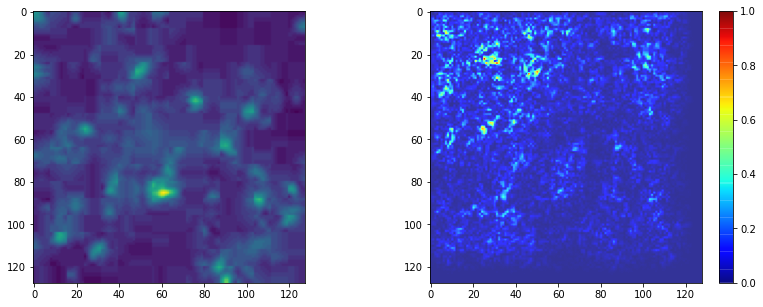

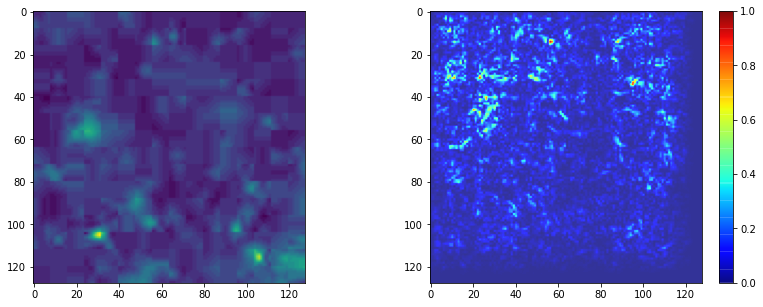

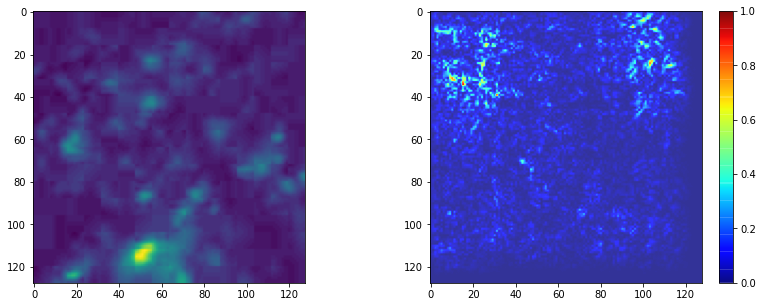

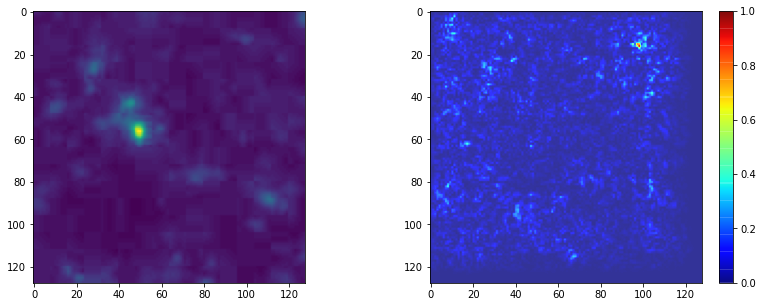

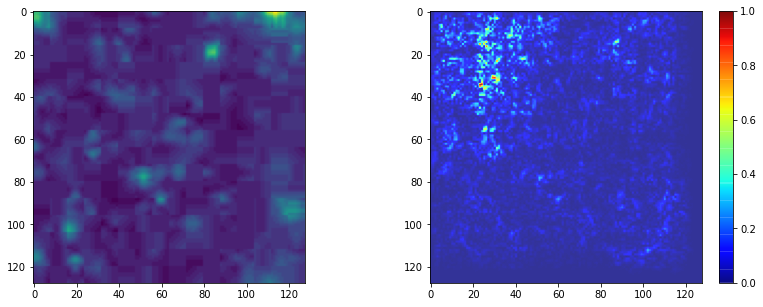

In [37]:
for i in range(5):
  dgrad_abs = tf.math.abs(_grad[i])
  dgrad_max_ =np.max(dgrad_abs, axis=3)[0]
  arr_min, arr_max  = np.min(dgrad_max_), np.max(dgrad_max_)
  grad_eval = ((dgrad_max_ - arr_min) / (arr_max - arr_min + 1e-18))
  fig, axes = plt.subplots(1,2,figsize=(14,5))
  axes[0].imshow(_IMG[i])
  i = axes[1].imshow(grad_eval,cmap="jet",alpha=0.8)
  fig.colorbar(i)